In [1]:
import re
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/shiyihe/Desktop/USABILITY_ANALYSIS')   

from reading_evaluator import (
    extract_reading_tasks,
    sanitize_reading_task_names,
    summarize_reading_times,
    add_correctness,
    summarize_reading_performance,
    plot_reading_task_performance,
    plot_reading_participant_performance
)

from duration_processor import load_quiz_data


# load data , rename task name, etc,.
folder = '/Users/shiyihe/Desktop/USABILITY_ANALYSIS/tabular'
all_data = load_quiz_data(folder, ignore_completed=True)


In [2]:
# 假设 df_tasks 已经由 extract_reading_tasks 得到
df_tasks = extract_reading_tasks(all_data, format_list=['hjson','json','xml'])

# # 2. （可选）查看清理前后的 task 名
# print("原始 task:", df_tasks['task'].unique()[:5])
# df_clean = sanitize_reading_task_names(df_tasks)
# print("清理后 task:", df_clean['task_clean'].unique()[:5])

# 3. 计算并查看各 format×task 平均时长
df_task_avg, df_part_avg = summarize_reading_times(df_tasks)
print("\nAverage duration per format and task:")
print(df_task_avg)

# 4. 查看各 format 下平均总时长（所有 task 累加后）
print("\nAverage total duration per participant by format:")
print(df_part_avg)

correct_answers = {
    'reading-task-tabular-1': 87,
    'reading-task-tabular-2': 'quiz2',
    'reading-task-tabular-3': 4,
    'reading-task-tabular-4': 'Bob',
    'reading-task-tabular-5': ['[Bob, Eve]', 'Alice']
}


df = add_correctness(df_tasks, correct_answers)

# 检查 tabular-5 的几行
print(df[df['task_clean']=='reading-task-tabular-5'][['q','correct']])
df_tasks = extract_reading_tasks(all_data, format_list=['hjson','json','xml'])
df_user = df_tasks[df_tasks['participantId']=='6697c8b6d9d7baa7edd8c4d3'].copy()
df_user = sanitize_reading_task_names(df_user)
df_user = add_correctness(df_user, correct_answers)
print(df_user[['task_clean','q','correct']])


Average duration per format and task:
   format                    task  average_duration_sec
0   hjson  reading-task-tabular-1            134.684667
1   hjson  reading-task-tabular-2             98.639556
2   hjson  reading-task-tabular-3             47.733444
3   hjson  reading-task-tabular-4             88.402222
4   hjson  reading-task-tabular-5            133.678222
5    json  reading-task-tabular-1            147.788667
6    json  reading-task-tabular-2             77.906889
7    json  reading-task-tabular-3             35.791111
8    json  reading-task-tabular-4             46.933111
9    json  reading-task-tabular-5             79.166000
10    xml  reading-task-tabular-1            113.401000
11    xml  reading-task-tabular-2             99.264286
12    xml  reading-task-tabular-3             68.978143
13    xml  reading-task-tabular-4             96.971714
14    xml  reading-task-tabular-5             89.040571

Average total duration per participant by format:
  format  aver

/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_1210/1444685105.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/var/folders/hs/htjkkv116fv94g1llc3jj8jc0000gn/T/ipykernel_1210/1444685105.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


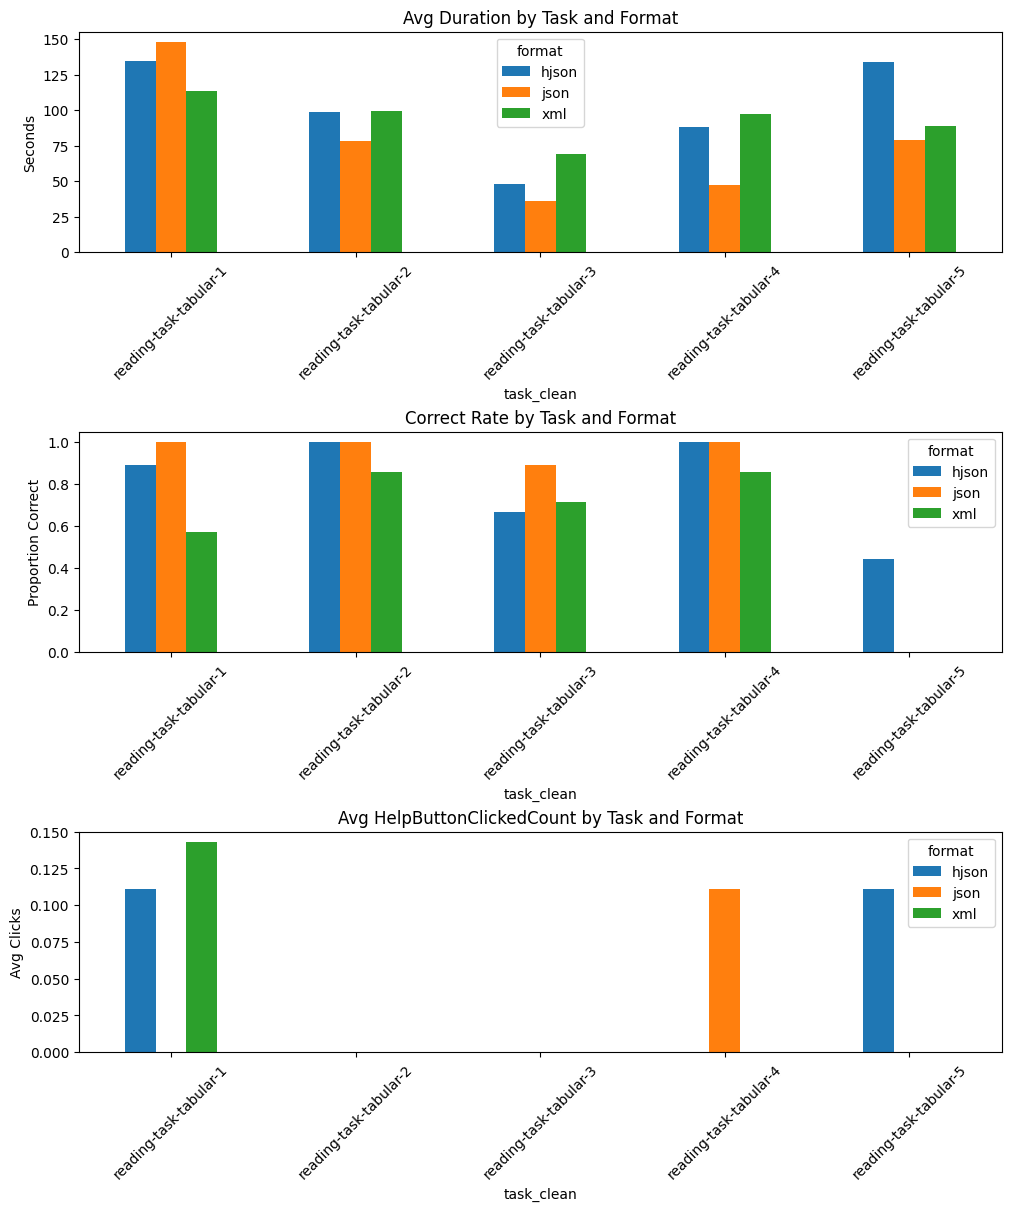

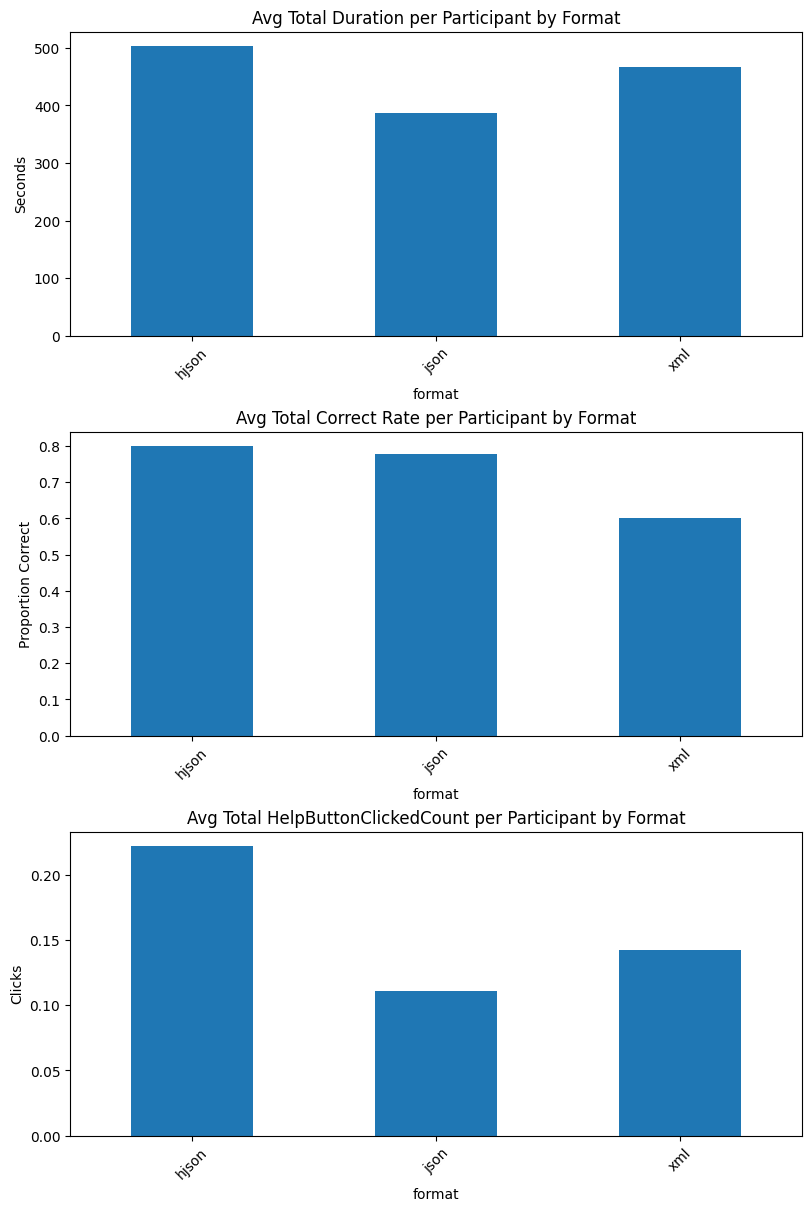

In [3]:
df_task_perf, df_part_perf = summarize_reading_performance(df_tasks, correct_answers)

# 应该不再报 ImportError
fig1 = plot_reading_task_performance(df_task_perf)
fig2 = plot_reading_participant_performance(df_part_perf)
fig1.show()
fig2.show()